In [2]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("hosammhmdali/supermarket-sales")

# Find the CSV file in the downloaded path
for file in os.listdir(path):
    if file.endswith(".csv"):
        dataset_path = os.path.join(path, file)
        break

# Load dataset into a Pandas DataFrame
df = pd.read_csv(dataset_path)

# Display the DataFrame
print(df.head())  # Print first 5 rows


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')


In [6]:
summary_stats = df[numerical_columns].describe().T  # Transpose for better readability
summary_stats["skewness"] = df[numerical_columns].skew()
summary_stats["kurtosis"] = df[numerical_columns].kurtosis()
print(summary_stats)


                          count        mean           std        min  \
Unit price               1000.0   55.672130  2.649463e+01  10.080000   
Quantity                 1000.0    5.510000  2.923431e+00   1.000000   
Tax 5%                   1000.0   15.379369  1.170883e+01   0.508500   
Total                    1000.0  322.966749  2.458853e+02  10.678500   
cogs                     1000.0  307.587380  2.341765e+02  10.170000   
gross margin percentage  1000.0    4.761905  6.131498e-14   4.761905   
gross income             1000.0   15.379369  1.170883e+01   0.508500   
Rating                   1000.0    6.972700  1.718580e+00   4.000000   

                                25%         50%         75%          max  \
Unit price                32.875000   55.230000   77.935000    99.960000   
Quantity                   3.000000    5.000000    8.000000    10.000000   
Tax 5%                     5.924875   12.088000   22.445250    49.650000   
Total                    124.422375  253.848000

In [7]:
summary_stats = df[numerical_columns].describe().T  # Transpose for better readability
summary_stats["skewness"] = df[numerical_columns].skew()
summary_stats["kurtosis"] = df[numerical_columns].kurtosis()
print(summary_stats)


                          count        mean           std        min  \
Unit price               1000.0   55.672130  2.649463e+01  10.080000   
Quantity                 1000.0    5.510000  2.923431e+00   1.000000   
Tax 5%                   1000.0   15.379369  1.170883e+01   0.508500   
Total                    1000.0  322.966749  2.458853e+02  10.678500   
cogs                     1000.0  307.587380  2.341765e+02  10.170000   
gross margin percentage  1000.0    4.761905  6.131498e-14   4.761905   
gross income             1000.0   15.379369  1.170883e+01   0.508500   
Rating                   1000.0    6.972700  1.718580e+00   4.000000   

                                25%         50%         75%          max  \
Unit price                32.875000   55.230000   77.935000    99.960000   
Quantity                   3.000000    5.000000    8.000000    10.000000   
Tax 5%                     5.924875   12.088000   22.445250    49.650000   
Total                    124.422375  253.848000

In [10]:
from IPython import get_ipython
from IPython.display import display
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt  # Import matplotlib.pyplot
import seaborn as sns  # Import seaborn
from scipy.stats import norm  # Import norm
import numpy as np

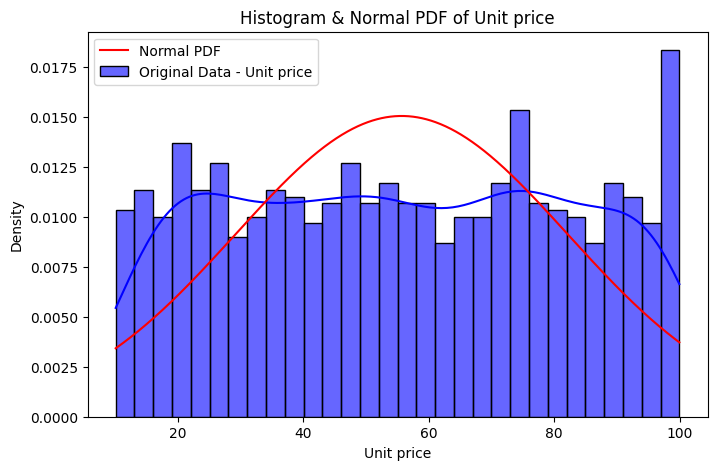

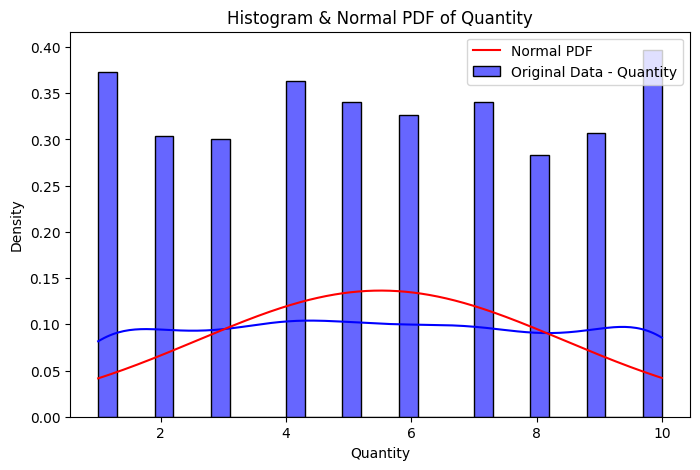

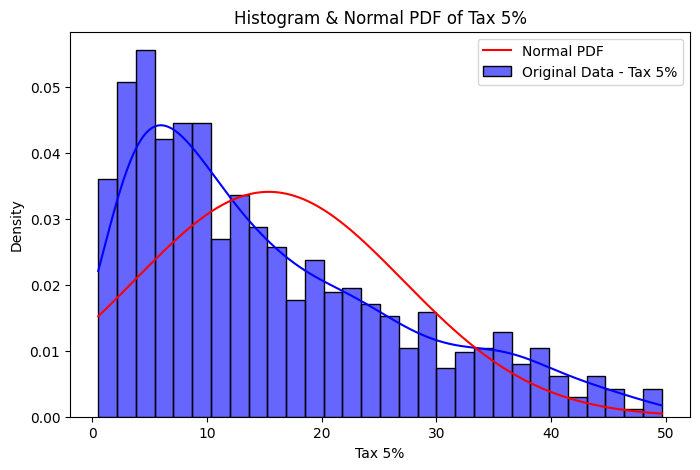

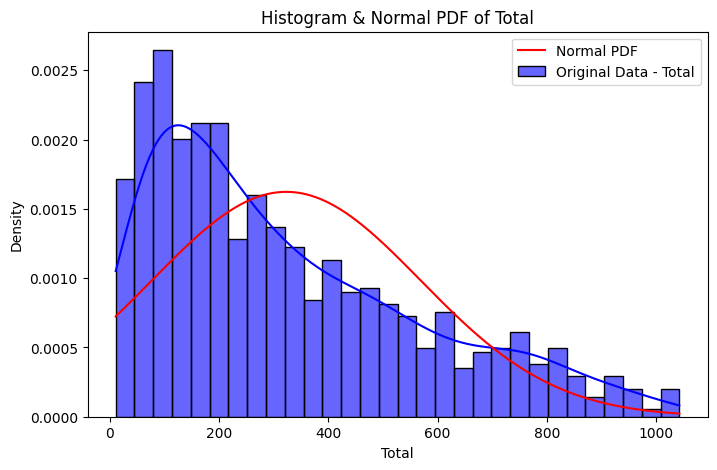

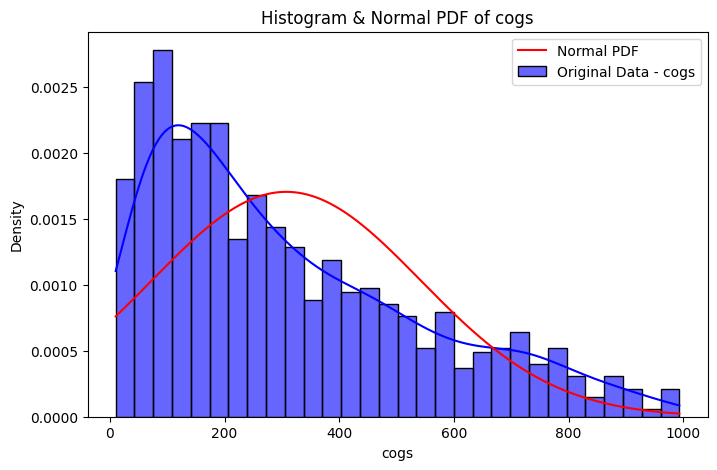

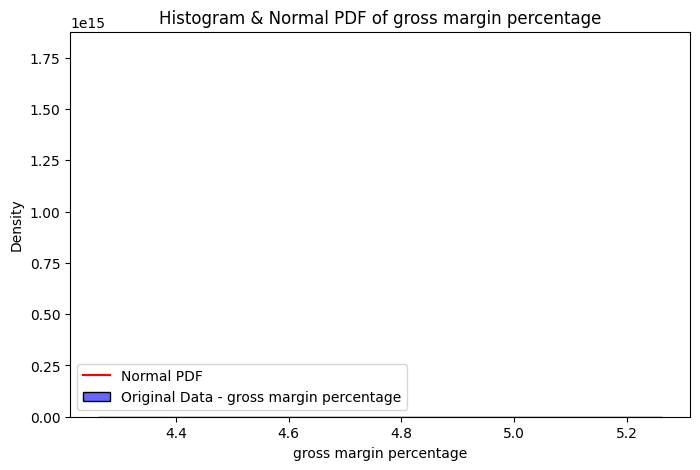

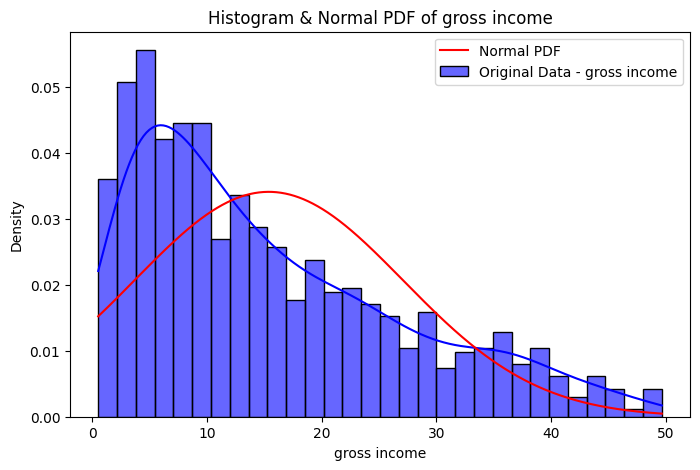

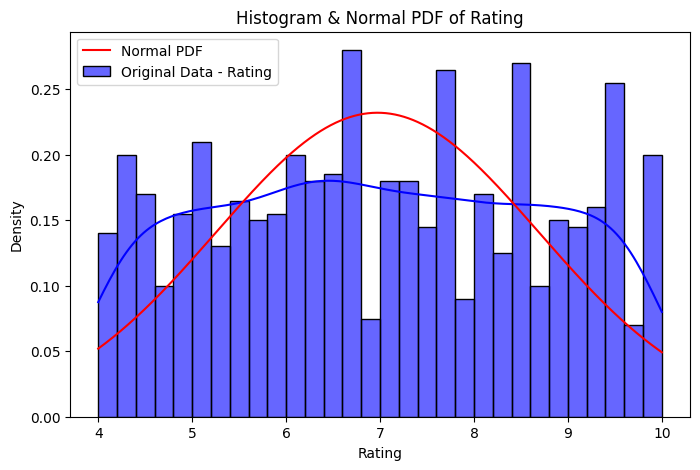

In [11]:
import numpy as np
for col in numerical_columns:
    data = df[col]
    mean_val = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Sample standard deviation

    # Plot histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True, bins=30, stat="density", color="blue", alpha=0.6, label=f"Original Data - {col}")

    # Plot normal distribution overlay
    x_vals = np.linspace(min(data), max(data), 1000)
    pdf_vals = norm.pdf(x_vals, mean_val, std_dev)
    plt.plot(x_vals, pdf_vals, color="red", label="Normal PDF")

    plt.title(f"Histogram & Normal PDF of {col}")
    plt.legend()
    plt.show()


In [13]:
mean_gross_margin = df["gross margin percentage"].mean()
mean_gross_margin

4.761904762

In [14]:
df["gross margin percentage"].head(50)


,gross margin percentage
0,4.761905
1,4.761905
2,4.761905
3,4.761905
4,4.761905
5,4.761905
6,4.761905
7,4.761905
8,4.761905
9,4.761905


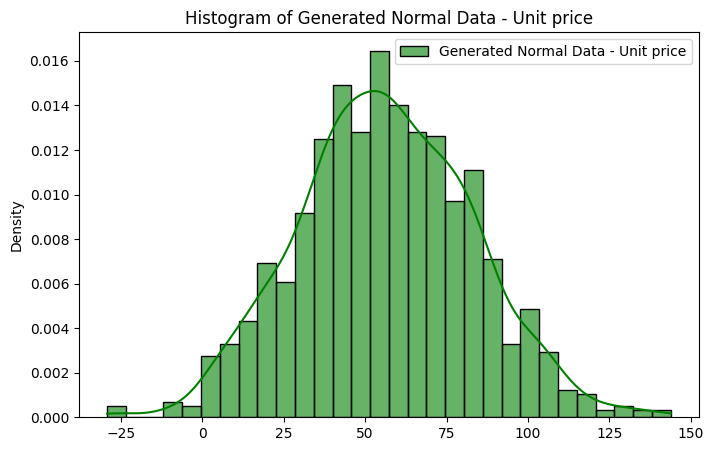

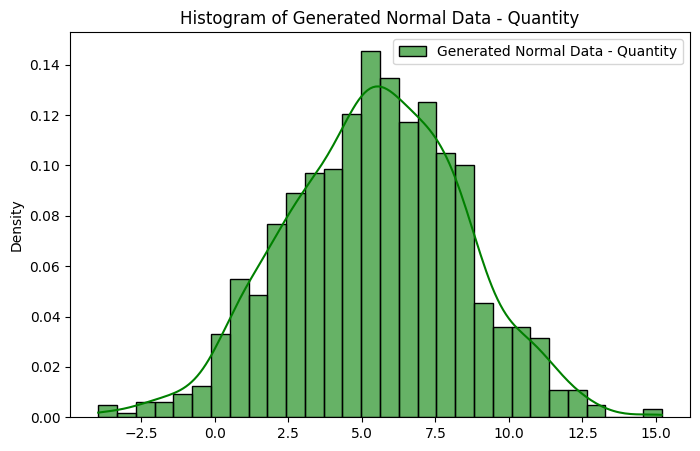

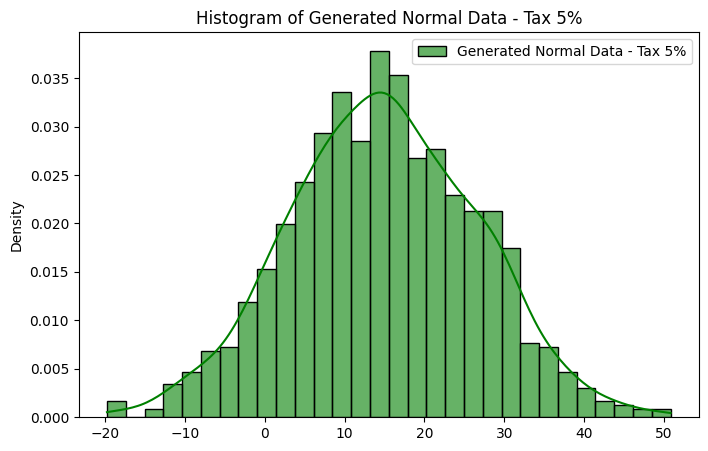

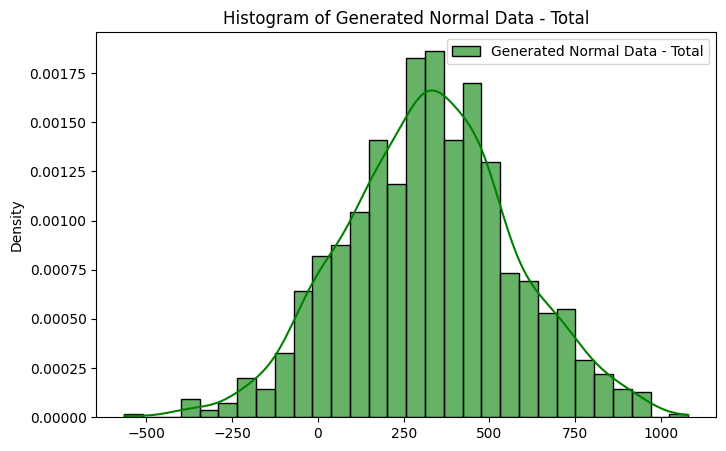

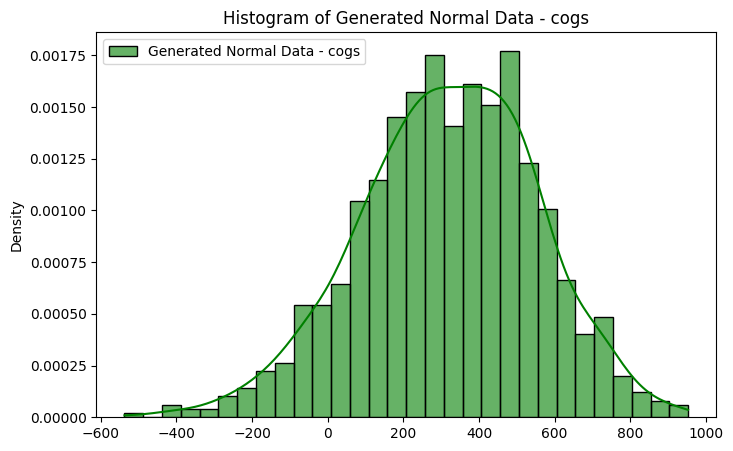

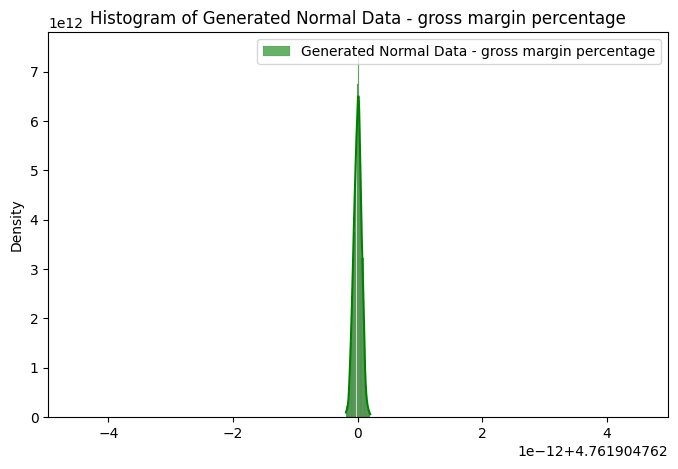

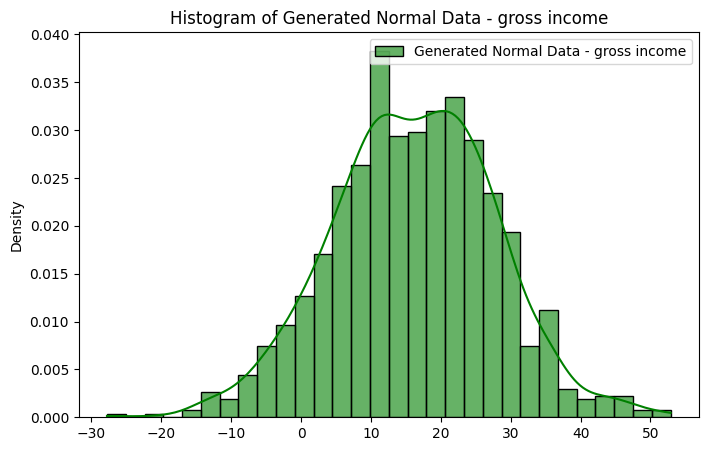

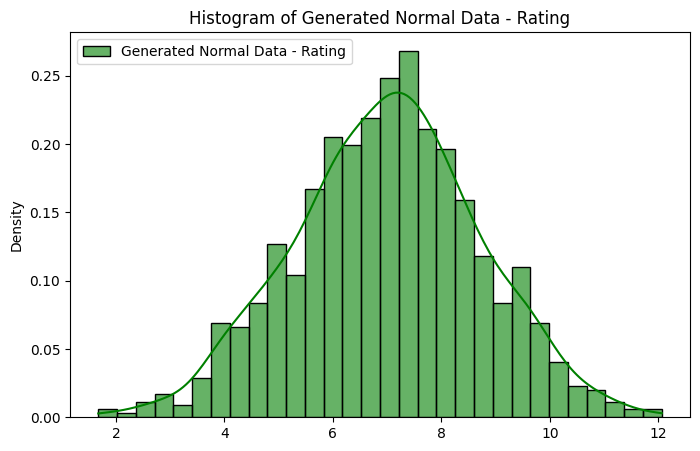

In [15]:
for col in numerical_columns:
    mean_val = np.mean(df[col])
    std_dev = np.std(df[col], ddof=1)

    random_samples = np.random.normal(mean_val, std_dev, 1000)

    plt.figure(figsize=(8, 5))
    sns.histplot(random_samples, bins=30, kde=True, stat="density", color="green", alpha=0.6, label=f"Generated Normal Data - {col}")
    plt.title(f"Histogram of Generated Normal Data - {col}")
    plt.legend()
    plt.show()


In [16]:
for col in numerical_columns:
    mean_val = np.mean(df[col])
    std_dev = np.std(df[col], ddof=1)

    threshold = mean_val
    probability = norm.cdf(threshold, mean_val, std_dev)
    print(f"Probability of a value being less than the mean in {col}: {probability}")


Probability of a value being less than the mean in Unit price: 0.5
Probability of a value being less than the mean in Quantity: 0.5
Probability of a value being less than the mean in Tax 5%: 0.5
Probability of a value being less than the mean in Total: 0.5
Probability of a value being less than the mean in cogs: 0.5
Probability of a value being less than the mean in gross margin percentage: 0.5
Probability of a value being less than the mean in gross income: 0.5
Probability of a value being less than the mean in Rating: 0.5


In [17]:
for col in numerical_columns:
    mean_val = np.mean(df[col])
    std_dev = np.std(df[col], ddof=1)

    percentile_95 = norm.ppf(0.95, mean_val, std_dev)
    print(f"95th percentile for {col}: {percentile_95}")


95th percentile for Unit price: 99.25191553280712
95th percentile for Quantity: 10.318615418076206
95th percentile for Tax 5%: 34.63867305976246
95th percentile for Total: 727.412134255012
95th percentile for cogs: 692.773461195249
95th percentile for gross margin percentage: 4.761904762000102
95th percentile for gross income: 34.63867305976246
95th percentile for Rating: 9.79951303041683


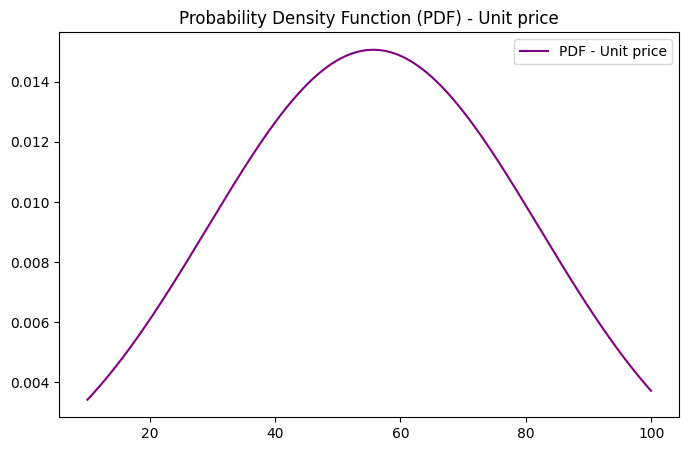

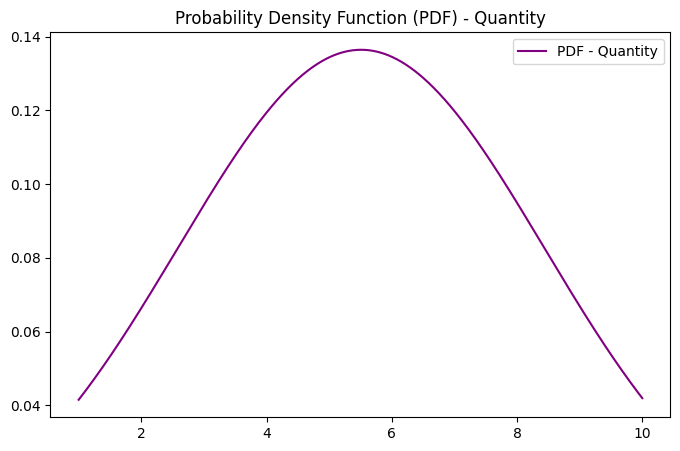

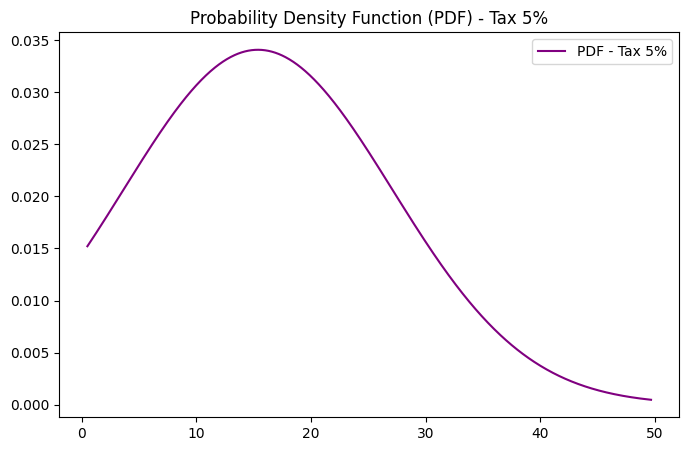

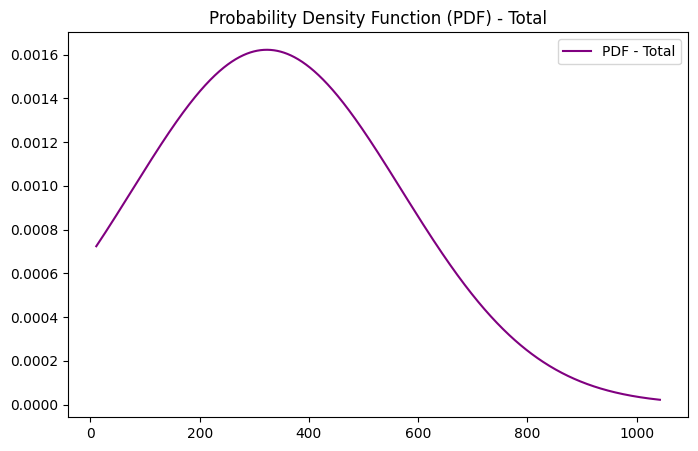

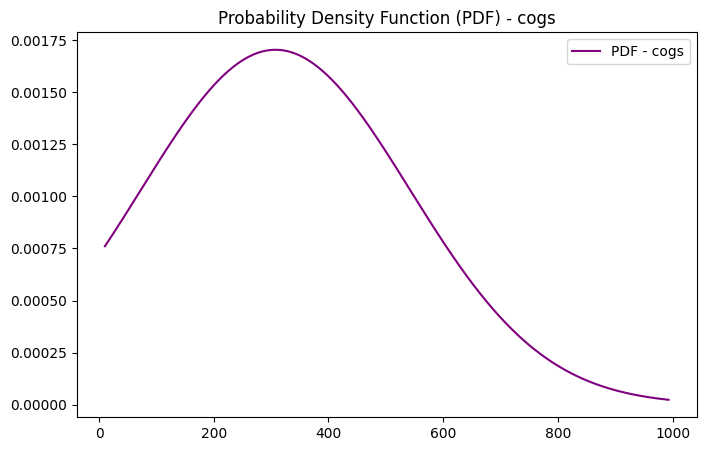

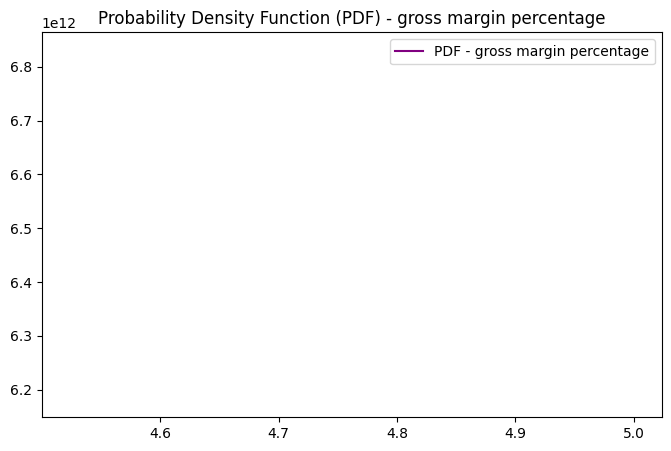

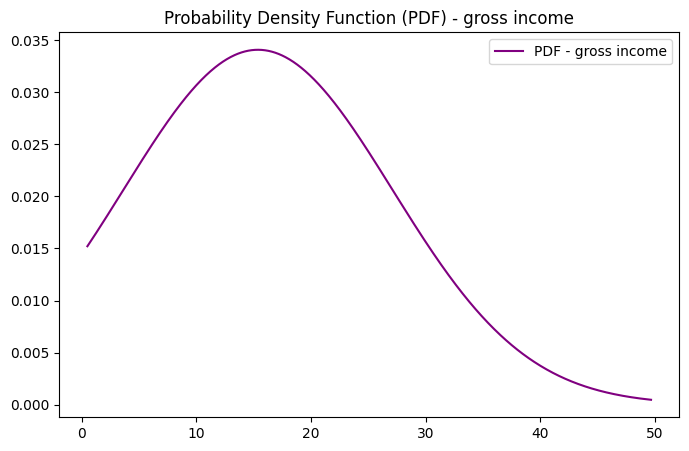

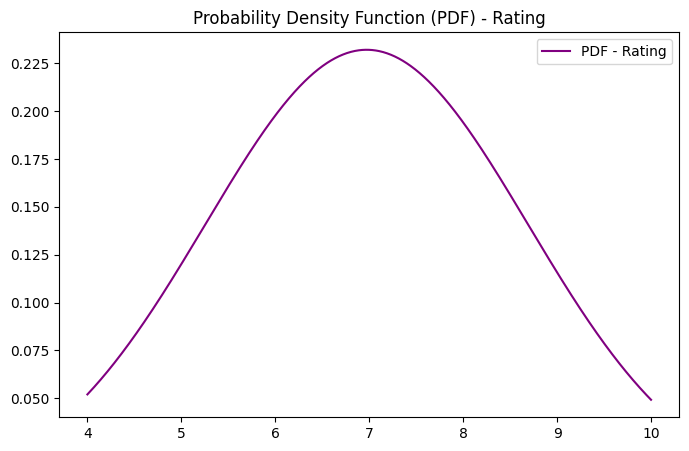

In [18]:
for col in numerical_columns:
    mean_val = np.mean(df[col])
    std_dev = np.std(df[col], ddof=1)

    x_vals = np.linspace(min(df[col]), max(df[col]), 1000)
    pdf_values = norm.pdf(x_vals, mean_val, std_dev)

    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, pdf_values, color="purple", label=f"PDF - {col}")
    plt.title(f"Probability Density Function (PDF) - {col}")
    plt.legend()
    plt.show()


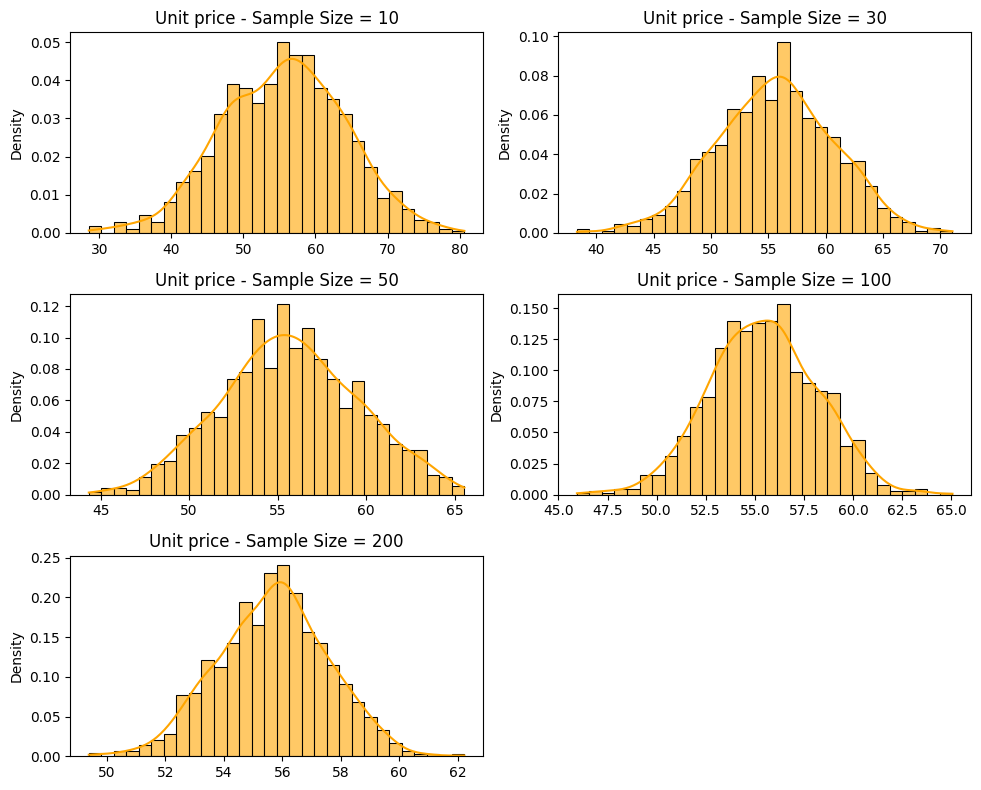

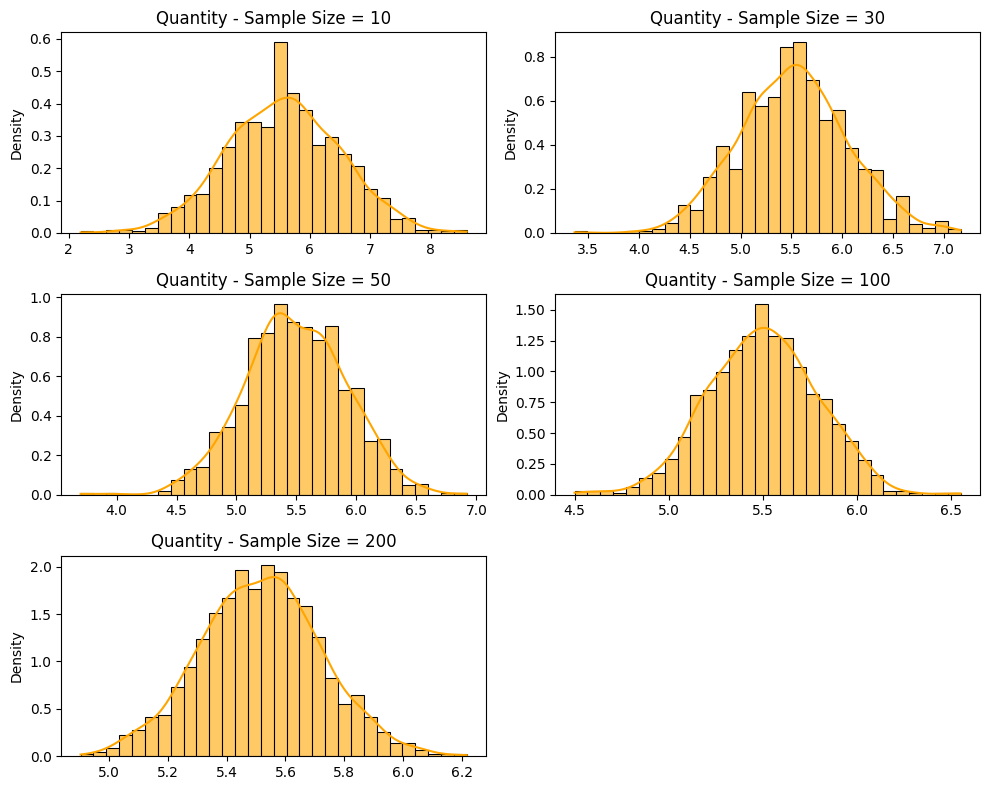

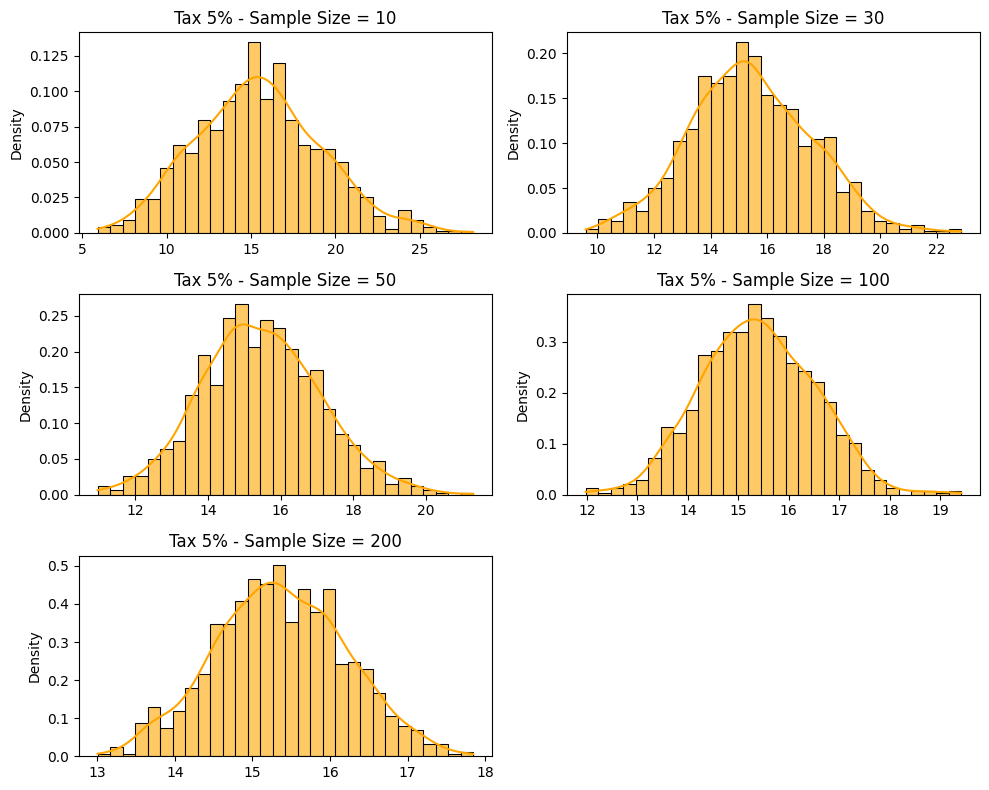

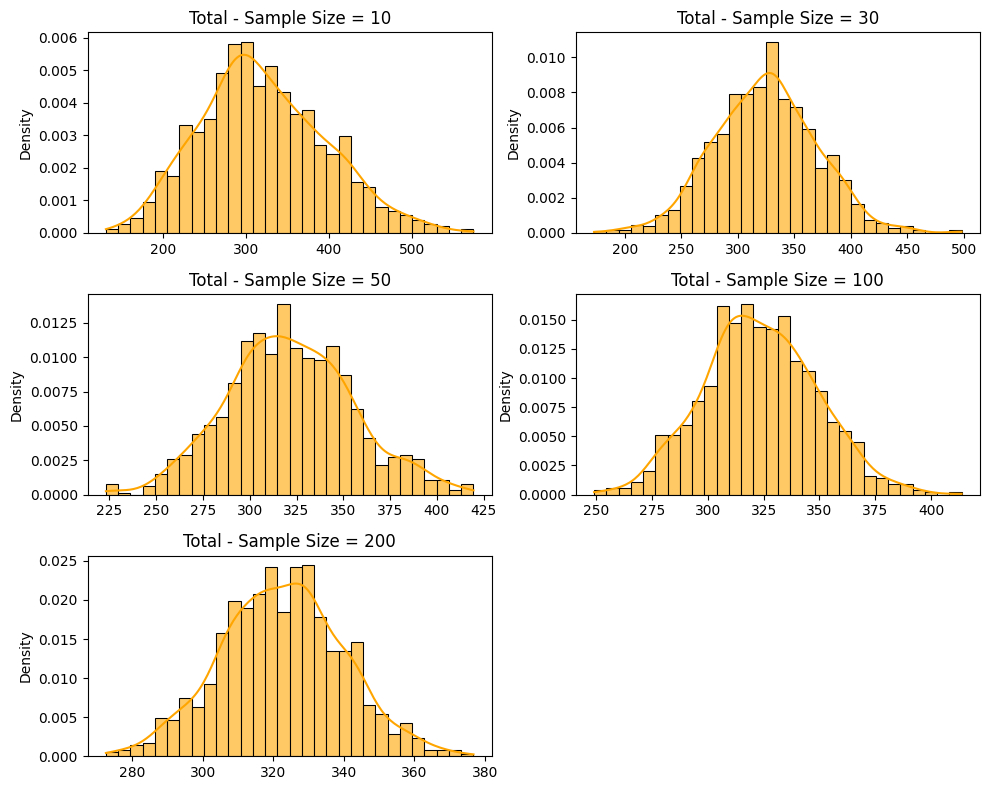

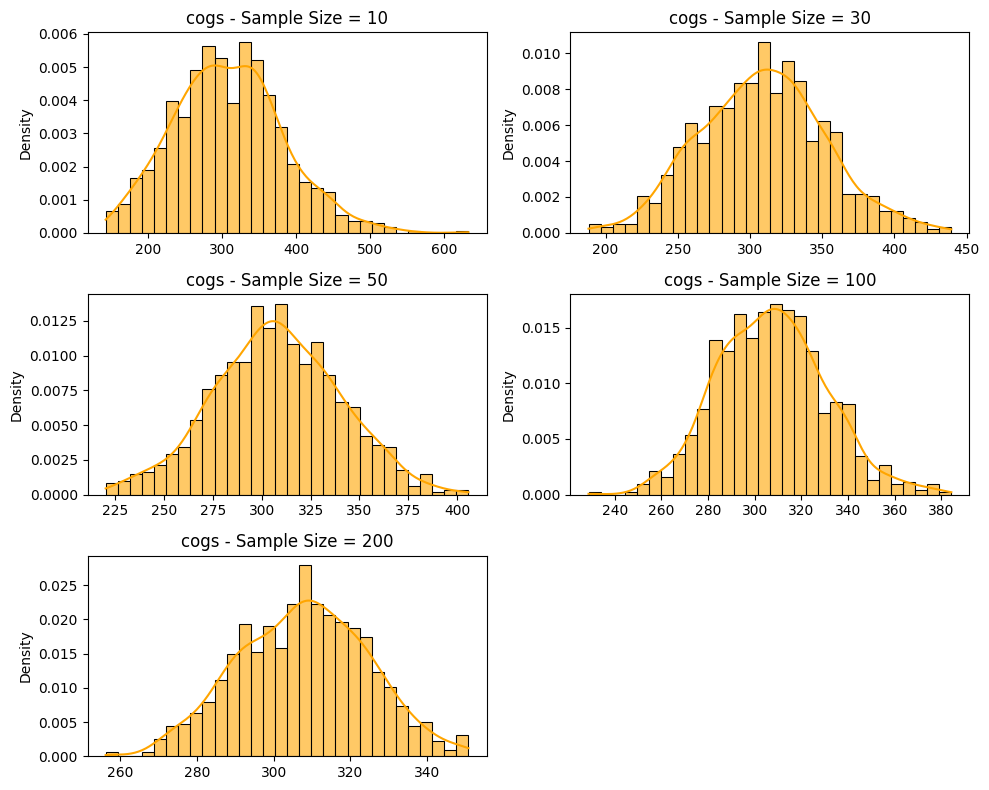

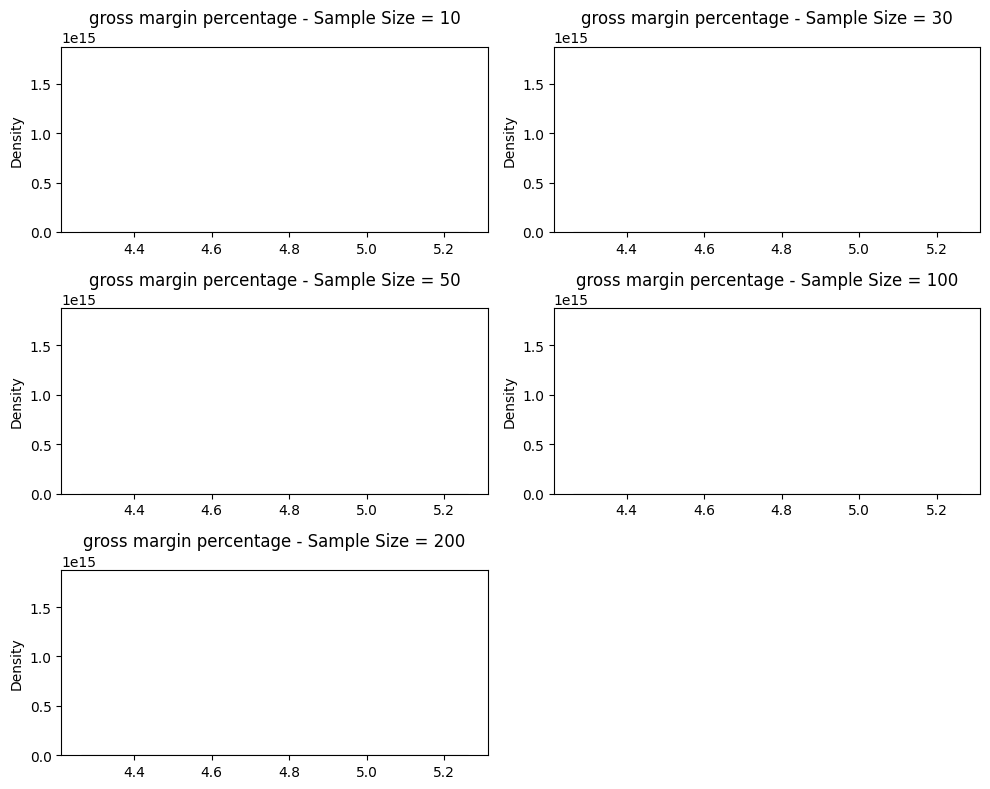

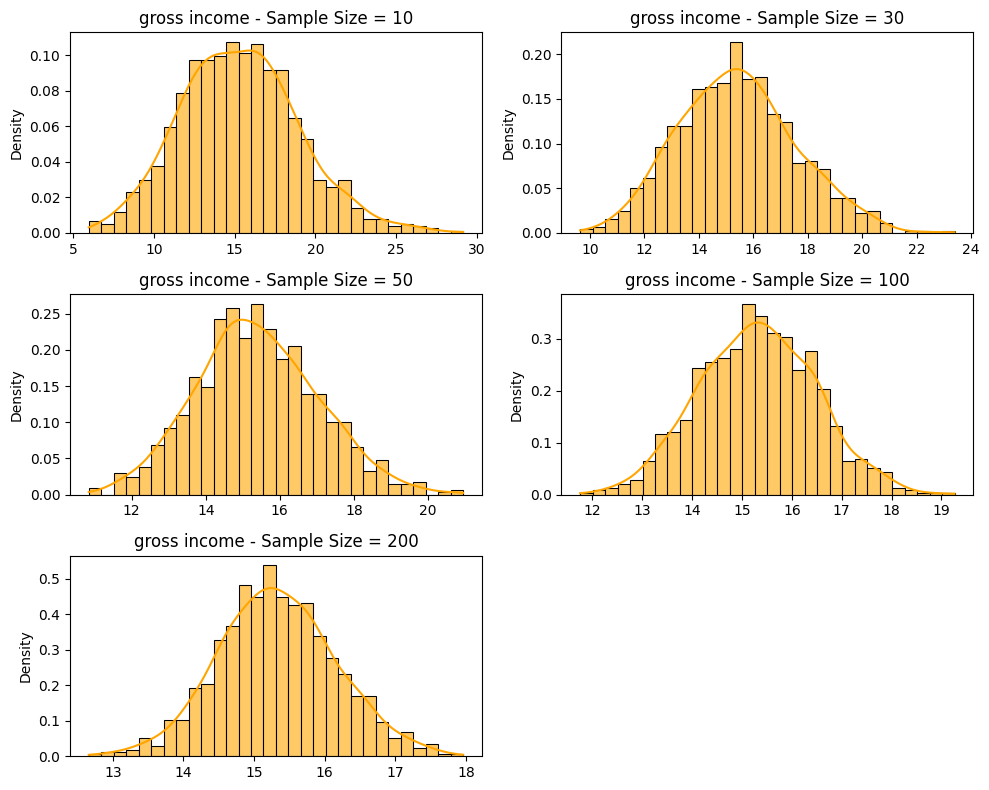

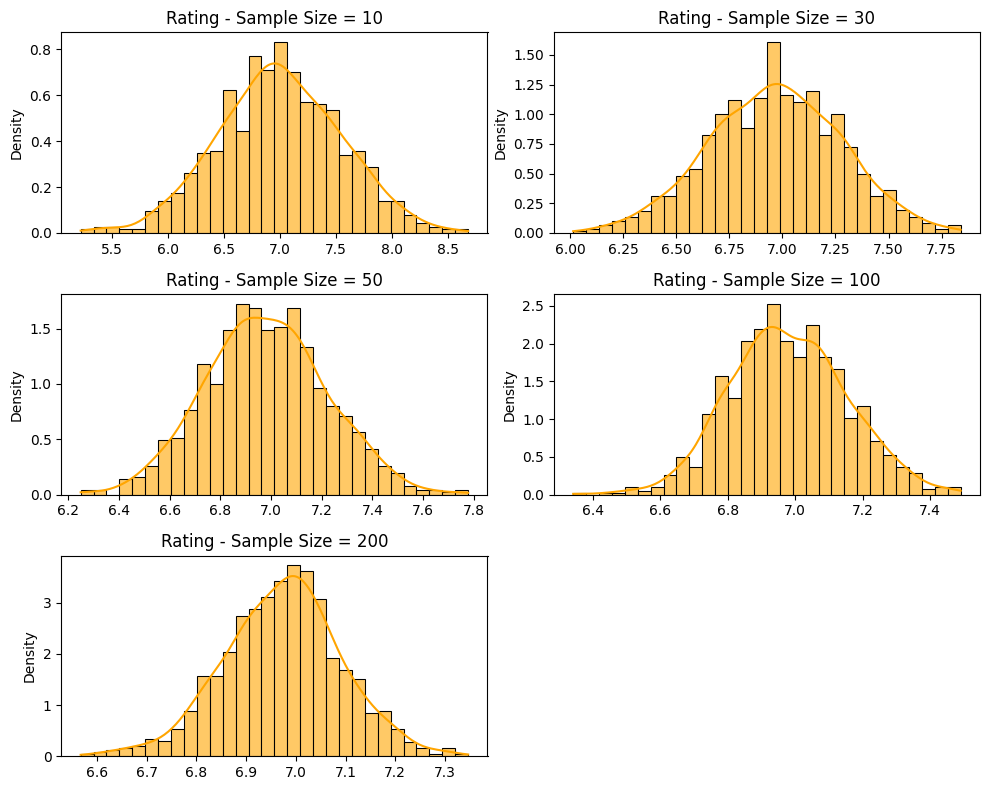

In [22]:
sample_sizes = [10, 30, 50, 100, 200]

for col in numerical_columns:
    plt.figure(figsize=(10, 8))
    for i, size in enumerate(sample_sizes):
        sample_means = [np.mean(np.random.choice(df[col], size, replace=True)) for _ in range(1000)]

        plt.subplot(3, 2, i + 1)
        sns.histplot(sample_means, bins=30, kde=True, stat="density", color="orange", alpha=0.6)
        plt.title(f"{col} - Sample Size = {size}")

    plt.tight_layout()
    plt.show()


In [23]:
from scipy.stats import norm, skew, kurtosis
for col in numerical_columns:
    original_skew = skew(df[col])
    original_kurt = kurtosis(df[col])
    print(f"{col} - Original Data: Skewness = {original_skew}, Kurtosis = {original_kurt}")

    for size in sample_sizes:
        sample_means = [np.mean(np.random.choice(df[col], size, replace=True)) for _ in range(1000)]
        sample_skew = skew(sample_means)
        sample_kurt = kurtosis(sample_means)
        print(f"{col} - Sample Size {size}: Skewness = {sample_skew}, Kurtosis = {sample_kurt}")


Unit price - Original Data: Skewness = 0.0070668272550450705, Kurtosis = -1.2185010010253237
Unit price - Sample Size 10: Skewness = -0.08070712591426428, Kurtosis = -0.07758570192616876
Unit price - Sample Size 30: Skewness = -0.009699248577979314, Kurtosis = -0.3020750620657666
Unit price - Sample Size 50: Skewness = -0.11548100603066373, Kurtosis = 0.11921261367765057
Unit price - Sample Size 100: Skewness = 0.019240645762599696, Kurtosis = -0.22801061733748362
Unit price - Sample Size 200: Skewness = 0.03979333999680198, Kurtosis = -0.020556808999358633
Quantity - Original Data: Skewness = 0.012921628351325404, Kurtosis = -1.2154719990982255
Quantity - Sample Size 10: Skewness = 0.0509653728911803, Kurtosis = 0.06147092244012642
Quantity - Sample Size 30: Skewness = 0.04404009755696546, Kurtosis = -0.21462981101076517
Quantity - Sample Size 50: Skewness = -0.10369377370498428, Kurtosis = 0.06622192366470792
Quantity - Sample Size 100: Skewness = -0.07445561595418144, Kurtosis = 0.1

<ipython-input-23-cc5e1d83f288>:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  original_skew = skew(df[col])
<ipython-input-23-cc5e1d83f288>:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  original_kurt = kurtosis(df[col])
<ipython-input-23-cc5e1d83f288>:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sample_skew = skew(sample_means)
<ipython-input-23-cc5e1d83f288>:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sample_kurt = kurtosis(sample_means)


gross margin percentage - Sample Size 100: Skewness = nan, Kurtosis = nan
gross margin percentage - Sample Size 200: Skewness = nan, Kurtosis = nan
gross income - Original Data: Skewness = 0.8912303920037635, Kurtosis = -0.08746991289328898
gross income - Sample Size 10: Skewness = 0.24617514744398647, Kurtosis = 0.045312738415230314
gross income - Sample Size 30: Skewness = 0.11466638885076437, Kurtosis = -0.12411227827127558
gross income - Sample Size 50: Skewness = 0.16396280557795573, Kurtosis = -0.17205586837294495
gross income - Sample Size 100: Skewness = 0.18788801052051507, Kurtosis = 0.11676693401786631
gross income - Sample Size 200: Skewness = 0.03260059805583343, Kurtosis = -0.04916609762204205
Rating - Original Data: Skewness = 0.008996128657606762, Kurtosis = -1.1518309660931607
Rating - Sample Size 10: Skewness = -0.010085569474245893, Kurtosis = 0.1232847890376032
Rating - Sample Size 30: Skewness = -0.014938659124686027, Kurtosis = -0.036556937373652065
Rating - Sampl

In [25]:
from scipy.stats import norm, skew, kurtosis

# Define sample sizes
sample_sizes = [10, 30, 50, 100, 200]

# Iterate over numerical columns
for col in numerical_columns:
    print("=" * 60)
    print(f"Analysis for Column: {col}\n")

    # Compute skewness & kurtosis for the original data
    original_skew = skew(df[col])
    original_kurt = kurtosis(df[col])

    print(f"Original Data:")
    print(f"  - Skewness: {original_skew:.4f}")
    print(f"  - Kurtosis: {original_kurt:.4f}\n")

    print(f"{'Sample Size':<15}{'Skewness':<15}{'Kurtosis':<15}")
    print("-" * 45)

    # Compute for different sample sizes
    for size in sample_sizes:
        sample_means = [np.mean(np.random.choice(df[col], size, replace=True)) for _ in range(1000)]
        sample_skew = skew(sample_means)
        sample_kurt = kurtosis(sample_means)

        print(f"{size:<15}{sample_skew:<15.4f}{sample_kurt:<15.4f}")

    print("=" * 60, "\n")


Analysis for Column: Unit price

Original Data:
  - Skewness: 0.0071
  - Kurtosis: -1.2185

Sample Size    Skewness       Kurtosis       
---------------------------------------------
10             -0.0240        0.0044         
30             -0.1281        0.1268         
50             -0.0530        -0.2338        
100            -0.0224        0.0865         
200            0.0387         -0.1066        

Analysis for Column: Quantity

Original Data:
  - Skewness: 0.0129
  - Kurtosis: -1.2155

Sample Size    Skewness       Kurtosis       
---------------------------------------------
10             -0.0469        -0.2859        
30             0.1038         -0.1757        
50             -0.0863        -0.0413        
100            -0.0116        -0.1272        
200            -0.0609        0.0726         

Analysis for Column: Tax 5%

Original Data:
  - Skewness: 0.8912
  - Kurtosis: -0.0875

Sample Size    Skewness       Kurtosis       
--------------------------------------

<ipython-input-25-2e0d17571aa6>:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  original_skew = skew(df[col])
<ipython-input-25-2e0d17571aa6>:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  original_kurt = kurtosis(df[col])
<ipython-input-25-2e0d17571aa6>:25: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sample_skew = skew(sample_means)
<ipython-input-25-2e0d17571aa6>:26: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sample_kurt = kurtosis(sample_means)


30             nan            nan            
50             nan            nan            
100            nan            nan            
200            nan            nan            

Analysis for Column: gross income

Original Data:
  - Skewness: 0.8912
  - Kurtosis: -0.0875

Sample Size    Skewness       Kurtosis       
---------------------------------------------
10             0.1944         -0.1793        
30             0.1604         -0.1023        
50             0.1476         -0.1149        
100            -0.0489        -0.2111        
200            0.1005         0.0103         

Analysis for Column: Rating

Original Data:
  - Skewness: 0.0090
  - Kurtosis: -1.1518

Sample Size    Skewness       Kurtosis       
---------------------------------------------
10             0.1084         -0.1201        
30             0.1050         0.0161         
50             -0.0138        -0.1396        
100            0.0661         0.2154         
200            -0.0064        -0.2

In [24]:
for col in numerical_columns:
    mean_val = np.mean(df[col])
    std_dev = np.std(df[col], ddof=1)

    z_score_99 = norm.ppf(0.99, mean_val, std_dev)
    print(f"{col} - 99th Percentile Value: {z_score_99}")


Unit price - 99th Percentile Value: 117.30785233068535
Quantity - 99th Percentile Value: 12.31091655064431
Tax 5% - 99th Percentile Value: 42.61817026523645
Total - 99th Percentile Value: 894.981575569966
cogs - 99th Percentile Value: 852.3634053047288
gross margin percentage - 99th Percentile Value: 4.761904762000143
gross income - 99th Percentile Value: 42.61817026523645
Rating - 99th Percentile Value: 10.970715614197355


**Observations(answes=rs for given questions) :**

CLT is validated → As sample size increases, sample means follow a normal distribution.

Normality Approximates at ~100 Samples → Skewness and kurtosis confirm this.

99th Percentile Threshold Found → The computed value indicates where 99% of data points lie.